<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/labs/JPMC_Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Feature Importance
#Dataframe and numerical library
import pandas as pd 
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learming Model
from sklearn.linear_model import LogisticRegression 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/churn.csv")
df.sample(5)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
707,No,84,no,yes,42,165.3,97,28.10,223.5,118,19.00,260.8,72,11.74,7.6,7,2.05,3
4819,No,103,no,no,0,170.6,79,29.00,144.8,126,12.31,193.6,102,8.71,6.0,3,1.62,0
3948,No,108,no,yes,15,196.8,79,33.46,173.5,99,14.75,274.7,108,12.36,14.6,5,3.94,1
2038,Yes,136,no,no,0,269.8,106,45.87,228.8,101,19.45,257.5,106,11.59,10.1,8,2.73,1
115,Yes,36,yes,yes,42,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,20.0,6,5.40,0


In [ ]:
df.shape

(5000, 18)

In [ ]:
df.isnull().sum()

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [ ]:
df = df.fillna(0)  # Use with caution.  you eliminate the big holes and then small holes in your data before doing this
print(df.isnull().sum())
print(df.dtypes)

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64
churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                f

In [ ]:
df.nunique()

churn                            2
accountlength                  218
internationalplan                2
voicemailplan                    2
numbervmailmessages             48
totaldayminutes               1961
totaldaycalls                  123
totaldaycharge                1961
totaleveminutes               1879
totalevecalls                  126
totalevecharge                1659
totalnightminutes             1853
totalnightcalls                131
totalnightcharge              1028
totalintlminutes               170
totalintlcalls                  21
totalintlcharge                170
numbercustomerservicecalls      10
dtype: int64

- Standard Scaler: good when data is normalized BUT the features have different scales (works well with Log Reg, Lin Reg, SVM)
- Min-Max Scaler: resize them to a value between 0 and 1. When the data is NOT normalized and the features have diff scales.  Works well with larger models... NN... image processing
- Robust Scaler: good when the data has a lot of outliers or when there is NOT a normalized dataset. Good SVM, KNN
- Max Abs Scaler: goes from -1 to 1.  Good when there are positive and neg values in your dataset. Usually only used with NN.
- Power Transformer: good when the data is not normalized OR highly skeweed.  Good with most of the lin models and NN.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
df.dtypes

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object

In [ ]:
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)

In [ ]:
numDF.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
catDF.head()

,churn,internationalplan,voicemailplan
0,No,no,yes
1,No,no,yes
2,No,no,no
3,No,yes,no
4,No,yes,no


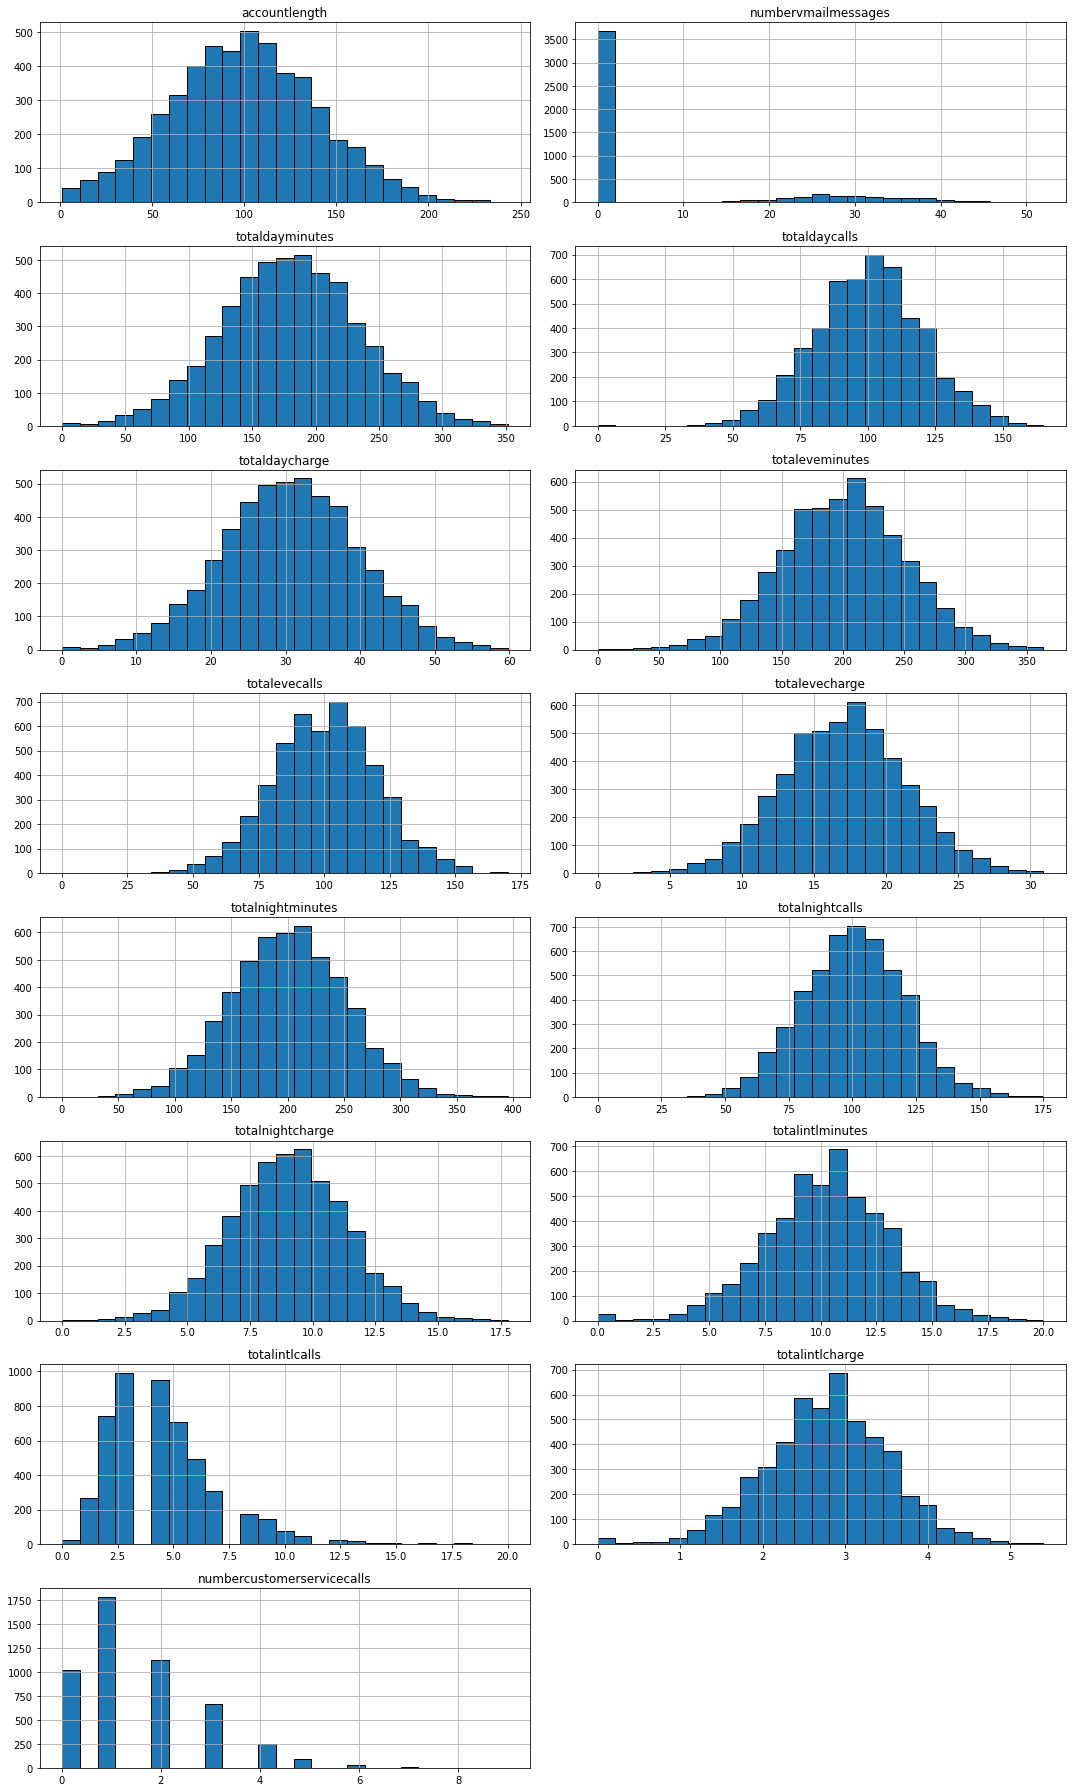

In [ ]:
# Plots the histogram for each numerical feature in a separate subplot
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 2),
edgecolor="black")
plt.tight_layout();

In [ ]:
# Scale all numeric columns
numDF = pd.DataFrame(scaler.fit_transform(numDF.values),columns=numDF.columns,index=numDF.index)
numDF.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0.518519,1.470588,1.172414,0.384615,1.172890,-0.053156,-0.037037,-0.053819,0.653392,-0.346154,0.652459,-0.085714,-0.333333,-0.085106,0.0
1,0.129630,1.529412,-0.255172,0.884615,-0.255682,-0.081211,0.111111,-0.081597,0.796460,0.115385,0.796721,0.971429,-0.333333,0.978723,0.0
2,0.685185,0.000000,0.873103,0.538462,0.873377,-1.178295,0.370370,-1.178819,-0.557522,0.153846,-0.557377,0.542857,0.333333,0.542553,-1.0
3,-0.296296,0.000000,1.645517,-1.115385,1.646104,-2.053894,-0.444444,-2.053819,-0.051622,-0.423077,-0.052459,-1.057143,1.000000,-1.063830,1.0
4,-0.462963,0.000000,-0.184828,0.500000,-0.185065,-0.778147,0.814815,-0.777778,-0.199115,0.807692,-0.200000,-0.057143,-0.333333,-0.053191,2.0


- Label Encoding: Ordinal relationship... like low, medium, and high.
- One Hot Encoding: create a new binary column for each sub-cat in a feature/col.  Creates a HUGE sparse matrix. 
- Dummy Encoding: multiple cat and the cat are NOT ordinal.  Order does NOT matter.
- Hash Encoding: good when there is HIGH cardinality of a cat variable. In other words, when there are a large number of unique values
- Count Encoding: replace the cat with their frequency counts. Good for high cardinality.

In [ ]:
# Drop the target variable from the DF
catDF.drop(['churn'],axis=1,inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
catDF.head()

,internationalplan,voicemailplan
0,no,yes
1,no,yes
2,no,no
3,yes,no
4,yes,no


In [ ]:
# Encode your cat data
catDF = pd.get_dummies(catDF,drop_first=True)

In [ ]:
catDF.head()

,internationalplan_yes,voicemailplan_yes
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


In [ ]:
# Merge with the original dataframe
# Prepare the X variables
X = pd.concat([catDF, numDF],axis=1)
print(X.shape)
#Prepare the Y variable
Y = df['churn']

(5000, 17)


In [ ]:
# Feature Importance

In [ ]:
# Tree models have trouble turning strings to float to labelel the target
Y = Y.replace(to_replace=['No','Yes'],value=[0,1])
print(Y.shape)
Y.head()

(5000,)


0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.ensemble import RandomForestClassifier

iris = load_iris() 
A, B = iris.data, iris.target

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(A, B)

importances = rf.feature_importances_
importances
# Print the feature importances with the corresponding column names
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance}")

sepal length (cm): 0.10612761987750428
sepal width (cm): 0.02167809317736852
petal length (cm): 0.4361295069034437
petal width (cm): 0.43606478004168353


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)

In [ ]:
# First we build and train our Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 300).fit(X_train, y_train)
rf.feature_importances_
# create a new DataFrame with feature importances and column names
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# sort the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the feature importances
print(feature_importances)

                       feature  importance
6               totaldaycharge    0.185200
4              totaldayminutes    0.184699
16  numbercustomerservicecalls    0.158359
0        internationalplan_yes    0.121344
7              totaleveminutes    0.053301
9               totalevecharge    0.052183
14              totalintlcalls    0.040252
13            totalintlminutes    0.038549
1            voicemailplan_yes    0.035143
3          numbervmailmessages    0.029933
15             totalintlcharge    0.028789
10           totalnightminutes    0.018877
12            totalnightcharge    0.018257
5                totaldaycalls    0.009584
11             totalnightcalls    0.009069
2                accountlength    0.008675
8                totalevecalls    0.007786


In [ ]:
# Permutation Importance

from sklearn.inspection import permutation_importance
iris = load_iris() 
A,B = iris.data, iris.target

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(A,B)

result = permutation_importance(rf, A,B, n_repeats=10, random_state=42) 
importances = result.importances_mean
# Print the feature importances with the corresponding column names
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance}")

sepal length (cm): 0.014666666666666672
sepal width (cm): 0.01266666666666667
petal length (cm): 0.22266666666666665
petal width (cm): 0.18066666666666667


In [ ]:
# Merge with the original dataframe
# Prepare the X variables
X = pd.concat([catDF, numDF],axis=1)
print(X.shape)
#Prepare the Y variable
Y = df['churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean


(5000, 17)


In [ ]:
print(perm.to_string())

                            AVG_Importance STD_Importance
internationalplan_yes             0.042667            NaN
voicemailplan_yes                 0.004133            NaN
accountlength                     0.001133            NaN
numbervmailmessages               0.017267            NaN
totaldayminutes                   0.045933            NaN
totaldaycalls                     0.001333            NaN
totaldaycharge                    0.039800            NaN
totaleveminutes                   0.013667            NaN
totalevecalls                     0.001467            NaN
totalevecharge                    0.016733            NaN
totalnightminutes                 0.002467            NaN
totalnightcalls                   0.000467            NaN
totalnightcharge                  0.001667            NaN
totalintlminutes                  0.006667            NaN
totalintlcalls                    0.020400            NaN
totalintlcharge                   0.008400            NaN
numbercustomer

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X,Y)

KNeighborsClassifier()

In [ ]:
results = permutation_importance(kn, X_test, y_test, n_repeats=10, random_state=0)

Feature: 0  Score: -0.004333333333333333
Feature: 1  Score: -0.004066666666666663
Feature: 2  Score: -0.002199999999999991
Feature: 3  Score: -0.0021333333333333204
Feature: 4  Score: 0.000333333333333341
Feature: 5  Score: 0.000666666666666682
Feature: 6  Score: 0.001333333333333331
Feature: 7  Score: 0.001533333333333331
Feature: 8  Score: 0.0024666666666666726
Feature: 9  Score: 0.002666666666666662
Feature: 10  Score: 0.004400000000000015
Feature: 11  Score: 0.005866666666666675
Feature: 12  Score: 0.005866666666666675
Feature: 13  Score: 0.016533333333333344
Feature: 14  Score: 0.031199999999999995
Feature: 15  Score: 0.031199999999999995
Feature: 16  Score: 0.03706666666666668


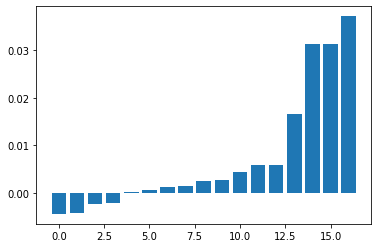

In [ ]:
from matplotlib import pyplot

# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

Feature 0: numbercustomerservicecalls - Score: 0.03706666666666668
Feature 1: totaldayminutes - Score: 0.031199999999999995
Feature 2: totaldayminutes - Score: 0.031199999999999995
Feature 3: numbervmailmessages - Score: 0.016533333333333344
Feature 4: totaleveminutes - Score: 0.005866666666666675
Feature 5: totaleveminutes - Score: 0.005866666666666675
Feature 6: totalintlcalls - Score: 0.004400000000000015
Feature 7: totalnightcalls - Score: 0.002666666666666662
Feature 8: accountlength - Score: 0.0024666666666666726
Feature 9: internationalplan_yes - Score: 0.001533333333333331
Feature 10: totalevecalls - Score: 0.001333333333333331
Feature 11: totaldaycalls - Score: 0.000666666666666682
Feature 12: voicemailplan_yes - Score: 0.000333333333333341
Feature 13: totalnightcharge - Score: -0.0021333333333333204
Feature 14: totalnightminutes - Score: -0.002199999999999991
Feature 15: totalintlminutes - Score: -0.004066666666666663
Feature 16: totalintlcharge - Score: -0.004333333333333333

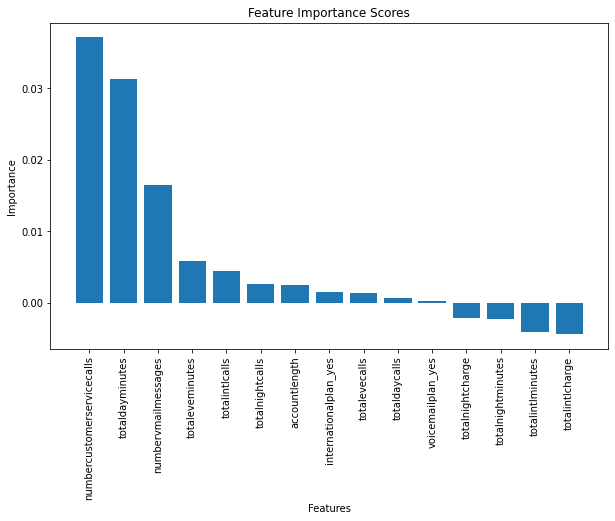

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
importance = results.importances_mean

# Get column headers
columns = X.columns

# Sort the importance scores in ascending order
importance_sorted = np.sort(importance)

# Reverse the order of the scores to plot them in descending order
importance_sorted = importance_sorted[::-1]

# Get the corresponding column headers for the sorted importance scores
columns_sorted = [columns[np.where(importance == score)[0][0]] for score in importance_sorted]

# Summarize feature importance
for i, (col, score) in enumerate(zip(columns_sorted, importance_sorted)):
    print('Feature {}: {} - Score: {}'.format(i, col, score))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(columns_sorted, importance_sorted)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.show()


In [ ]:
# Analyze the Coefficients:

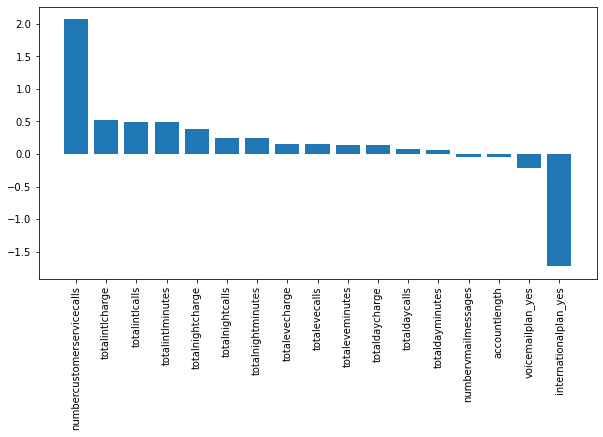

In [ ]:
# Coefficients
model = LogisticRegression()
model.fit(X,Y)
importance = model.coef_[0]
importance = np.sort(importance)
importance
importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
importance = importance.sort_values('importance', ascending=False)

# create a chart of feature importances
plt.figure(figsize=(10,5))
plt.bar(importance['feature'], importance['importance'])
plt.xticks(rotation=90)
plt.show()

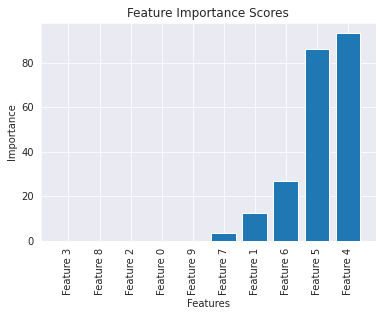

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a regression dataset with 10 features and 5 informative features
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Get the feature importances (i.e., coefficients) from the model
importance = model.coef_

# Sort the importance scores in ascending order
importance_sorted = np.sort(importance)

# Get the corresponding column names for the sorted importance scores
columns_sorted = [f'Feature {i}' for i in np.argsort(importance)]

# Plot the feature importances in ascending order
sns.set_style("darkgrid")
plt.bar(columns_sorted, importance_sorted)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.show()


In [ ]:
boston = pd.read_csv("https://raw.githubusercontent.com/eric-bunch/boston_housing/master/boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


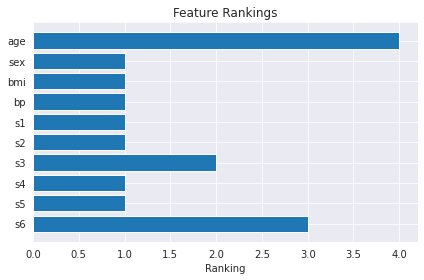

In [ ]:
# Import libraries
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()

# Split the dataset into X (features) and y (target)
X = diabetes.data
y = diabetes.target

# Create a linear regression model
model = LinearRegression()

# Perform recursive feature elimination with cross-validation
rfe = RFE(model, n_features_to_select=7, verbose=1)
X_rfe = rfe.fit_transform(X, y)

# Get the feature ranking and scores
feature_ranking = rfe.ranking_
feature_scores = rfe.estimator_.coef_

# Create a horizontal bar plot of the feature rankings
fig, ax = plt.subplots()
ax.barh(range(len(feature_ranking)), feature_ranking)
ax.set_yticks(range(len(feature_ranking)))
ax.set_yticklabels(diabetes.feature_names)
ax.invert_yaxis()
ax.set_xlabel('Ranking')
ax.set_title('Feature Rankings')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('feature_rankings.png')
